# Load Data

In [1]:
!cp /content/drive/MyDrive/PMCC/Dataset/72hour_20230621_MCF10A.zip 72hour_20230621_MCF10A.zip
!unzip 72hour_20230621_MCF10A.zip

Archive:  72hour_20230621_MCF10A.zip
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m23d_16h57m.tif  
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m23d_17h57m.tif  
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m23d_18h57m.tif  
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m23d_19h57m.tif  
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m23d_20h57m.tif  
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m23d_21h57m.tif  
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m23d_22h57m.tif  
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m23d_23h57m.tif  
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m24d_00h57m.tif  
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m24d_01h57m.tif  
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m24d_02h57m.tif  
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m24d_03h57m.tif  
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m24d_04h57m.tif  
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m24d_05h57m.tif  
  inflating: 72hour/10 Gy_GFP-H2B_A1_1_2023y06m24d_06h57m.tif  
  i

In [2]:
import os
from PIL import Image

# Define the source and destination folders
src_folder = '72hour/'          # Folder with .tiff images
dst_folder = '72hour_jpg/'      # Folder where .jpg images will be saved

# Create the destination folder if it doesn't exist
if not os.path.exists(dst_folder):
    os.makedirs(dst_folder)

# Loop through all files in the source folder
i = 0
for filename in sorted(os.listdir(src_folder)):
    if filename.endswith(".tiff") or filename.endswith(".tif"):  # Check for TIFF files
        # Open the TIFF image
        img_path = os.path.join(src_folder, filename)
        img = Image.open(img_path)

        # Convert the image to RGB (TIFF may be in different formats)
        img = img.convert("RGB")

        # Create the new filename by replacing the .tiff extension with .jpg
        jpg_filename = f"{i}.jpg"
        jpg_path = os.path.join(dst_folder, jpg_filename)

        # Save the image in .jpg format
        img.save(jpg_path, "JPEG")
        print(f"Converted {filename} to {jpg_filename}")
        i += 1

print("All images have been converted and saved.")

Converted 10 Gy_GFP-H2B_A1_1_2023y06m23d_16h57m.tif to 0.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m23d_17h57m.tif to 1.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m23d_18h57m.tif to 2.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m23d_19h57m.tif to 3.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m23d_20h57m.tif to 4.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m23d_21h57m.tif to 5.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m23d_22h57m.tif to 6.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m23d_23h57m.tif to 7.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m24d_00h57m.tif to 8.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m24d_01h57m.tif to 9.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m24d_02h57m.tif to 10.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m24d_03h57m.tif to 11.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m24d_04h57m.tif to 12.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m24d_05h57m.tif to 13.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m24d_06h57m.tif to 14.jpg
Converted 10 Gy_GFP-H2B_A1_1_2023y06m24d_07h57m.tif to 15.jpg
Converted 10 Gy_GF

# Track

- image to video -> video track
- [ULtrack](https://github.com/royerlab/ultrack?tab=readme-ov-file)
   - track confident nucleus -> estimate gloabl shift
- Hierarchy construction


In [3]:
# @title set up

import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/sam2.git'

!mkdir -p videos
!wget -P videos https://dl.fbaipublicfiles.com/segment_anything_2/assets/bedroom.zip
!unzip -d videos videos/bedroom.zip

!mkdir -p ../checkpoints/
!wget -P ../checkpoints/ https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_large.pt
!wget -P ../checkpoints/ https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt

PyTorch version: 2.5.0+cu121
Torchvision version: 0.20.0+cu121
CUDA is available: True
  Cloning https://github.com/facebookresearch/sam2.git to /tmp/pip-req-build-pyr_65dh
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/sam2.git /tmp/pip-req-build-pyr_65dh
  Resolved https://github.com/facebookresearch/sam2.git to commit c2ec8e14a185632b0a5d8b161928ceb50197eddc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.2 MB/s eta 0:00:00
  Created wheel for SAM-2: filename=SAM_2-1.0-cp310-cp

In [3]:
import os
# if using Apple MPS, fall back to CPU for unsupported ops
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
# select the device for computation
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"using device: {device}")

if device.type == "cuda":
    # use bfloat16 for the entire notebook
    torch.autocast("cuda", dtype=torch.bfloat16).__enter__()
    # turn on tfloat32 for Ampere GPUs (https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices)
    if torch.cuda.get_device_properties(0).major >= 8:
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True
elif device.type == "mps":
    print(
        "\nSupport for MPS devices is preliminary. SAM 2 is trained with CUDA and might "
        "give numerically different outputs and sometimes degraded performance on MPS. "
        "See e.g. https://github.com/pytorch/pytorch/issues/84936 for a discussion."
    )

using device: cuda


## Track one nuclei

In [ ]:
# @title load model

from sam2.build_sam import build_sam2_video_predictor

sam2_checkpoint = "../checkpoints/sam2.1_hiera_large.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"

# build mask generator
sam2 = build_sam2(model_cfg, sam2_checkpoint, device=device, apply_postprocessing=False)
mask_generator = SAM2AutomaticMaskGenerator(
    model=sam2,
    points_per_side=64,
    points_per_batch=128,
    pred_iou_thresh=0.7,
    stability_score_thresh=0.92,
    stability_score_offset=0.7,
    min_mask_region_area=25
)

# build video predictor
predictor = build_sam2_video_predictor(model_cfg, sam2_checkpoint, device=device)

def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

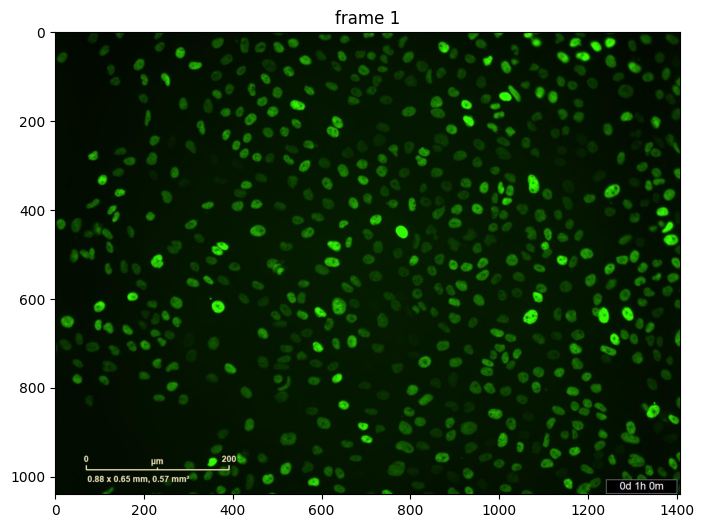

In [ ]:
frames = []
video_dir = '72hour_jpg'
frame_names = sorted(os.listdir(video_dir), key=lambda x: int(x[:-4]))
for filename in frame_names:
    img = Image.open(os.path.join(video_dir, filename))
    frames.append(np.array(img))

# take a look the first video frame
frame_idx = 1
plt.figure(figsize=(9, 6))
plt.title(f"frame {frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[frame_idx])))

In [ ]:
# @title initialize
inference_state = predictor.init_state(video_path=video_dir)

frame loading (JPEG): 100%|██████████| 73/73 [00:02<00:00, 24.36it/s]


In [ ]:
predictor.reset_state(inference_state)

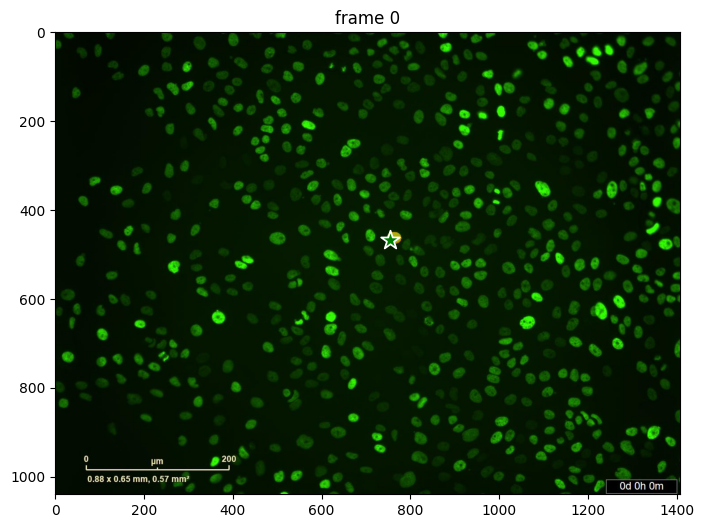

In [ ]:
# @title add click
ann_frame_idx = 0  # the frame index we interact with
ann_obj_id = 1  # give a unique id to each object we interact with (it can be any integers)

# Let's add a positive click at (x, y) = (210, 350) to get started
# points = [(755, 467), (772, 448), (750, 435), (690, 405), (650, 375), (630, 371), (600, 373), (540, 355), (485, 305), (433, 266)]  # example points
points = np.array([(755, 467)], dtype=np.float32)
# for labels, `1` means positive click and `0` means negative click
labels = np.array([1], np.int32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    points=points,
    labels=labels,
)

# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_points(points, labels, plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])

In [ ]:
# @title propagate across video
# run propagation throughout the video and collect the results in a dict
video_segments = {}  # video_segments contains the per-frame segmentation results
for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
    video_segments[out_frame_idx] = {
        out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
        for i, out_obj_id in enumerate(out_obj_ids)
    }

# render the segmentation results every few frames
vis_frame_stride = 1
plt.close("all")
points = [(755, 467), (772, 448), (750, 435), (690, 405), (650, 375), (630, 371), (600, 373), (540, 355), (485, 305), (433, 266)]

for out_frame_idx in range(0, 10, vis_frame_stride):
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {out_frame_idx}")
    plt.imshow(Image.open(os.path.join(video_dir, frame_names[out_frame_idx])))
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        show_mask(out_mask, plt.gca(), obj_id=out_obj_id)
    # Plot the current point
    current_point = points[out_frame_idx]
    plt.scatter(current_point[0], current_point[1], c='red', s=10)

Output hidden; open in https://colab.research.google.com to view.

## track multiple nuclei

In [20]:
# @title load model

from sam2.build_sam import build_sam2_video_predictor
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

sam2_checkpoint = "../checkpoints/sam2.1_hiera_tiny.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_t.yaml"

# build mask generator
sam2 = build_sam2(model_cfg, sam2_checkpoint, device=device, apply_postprocessing=False)
mask_generator = SAM2AutomaticMaskGenerator(
    model=sam2,
    points_per_side=128,
    points_per_batch=128,
    pred_iou_thresh=0.7,
    stability_score_thresh=0.92,
    stability_score_offset=0.7,
    # min_mask_region_area=25.0
)

# build video predictor
predictor = build_sam2_video_predictor(model_cfg, sam2_checkpoint, device=device)

def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='red', marker='.', s=marker_size, edgecolor='white', linewidth=0.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

def show_anns(anns, borders=True):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)[1:]
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:, :, 3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.5]])
        img[m] = color_mask
        if borders:
            import cv2
            contours, _ = cv2.findContours(m.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            # Try to smooth contours
            contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
            cv2.drawContours(img, contours, -1, (0, 0, 1, 0.4), thickness=1)

    ax.imshow(img)

In [21]:
# @title init video

video_dir = '72hour_jpg'
inference_state = predictor.init_state(video_path=video_dir)

frame loading (JPEG): 100%|██████████| 73/73 [00:03<00:00, 24.05it/s]


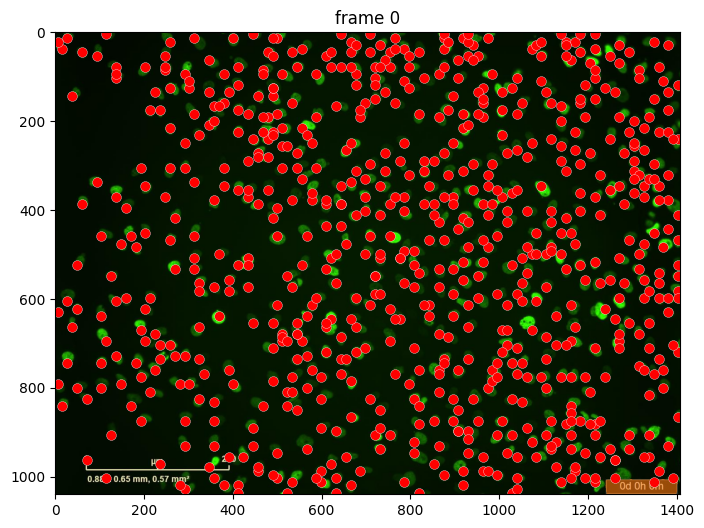

In [12]:
# @title add click

import os

# segment whole image
frame_names = sorted(os.listdir(video_dir), key=lambda x: int(x[:-4]))
img = Image.open(os.path.join(video_dir,frame_names[0]))
img = np.array(img.convert("RGB"))
masks = mask_generator.generate(img)

pl,ll = [], []
ann_frame_idx = 0  # the frame index we interact with

for i in range(1,len(masks)):
  ann_obj_id = i  # give a unique id to each object we interact with (it can be any integers)

  points = np.array(masks[i]["point_coords"], dtype=np.float32)
  # for labels, `1` means positive click and `0` means negative click
  labels = np.array([1]*len(points), np.int32)
  _, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
      inference_state=inference_state,
      frame_idx=ann_frame_idx,
      obj_id=ann_obj_id,
      points=points,
      labels=labels,
  )

  pl.append(points)
  ll.append(labels)

# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
for i in range(len(pl)):
  show_points(pl[i], ll[i], plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])

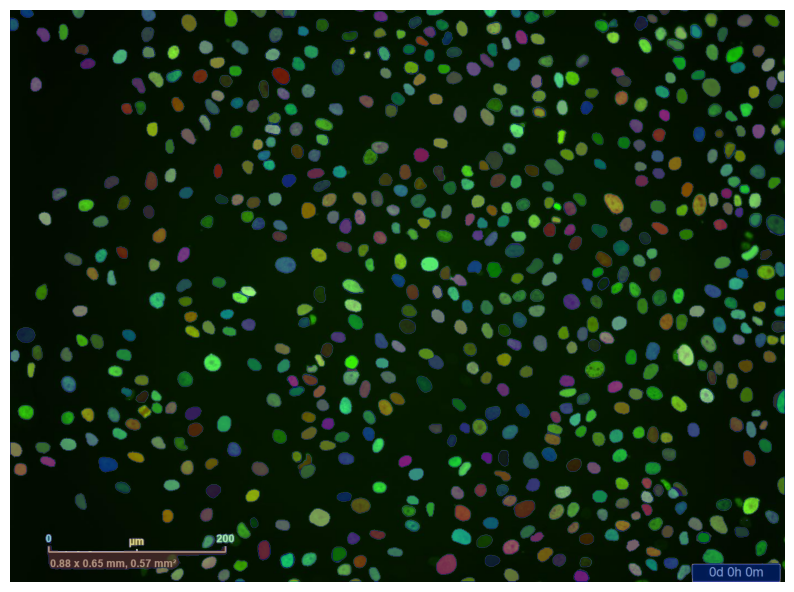

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_anns(masks)
plt.axis('off')
plt.show()

In [19]:
# del mask_generator
# del predictor
# del sam2
torch.cuda.empty_cache()

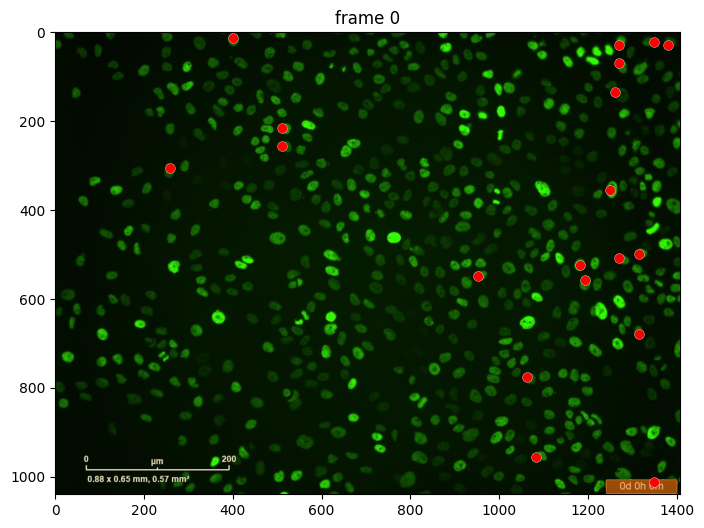

In [22]:
import os

# segment whole image
frame_names = sorted(os.listdir(video_dir), key=lambda x: int(x[:-4]))
img = Image.open(os.path.join(video_dir,frame_names[0]))
img = np.array(img.convert("RGB"))
masks = mask_generator.generate(img)

pl,ll = [], []
ann_frame_idx = 0  # the frame index we interact with

for i in range(1,20):
  ann_obj_id = i  # give a unique id to each object we interact with (it can be any integers)

  points = np.array(masks[i]["point_coords"], dtype=np.float32)
  # for labels, `1` means positive click and `0` means negative click
  labels = np.array([1]*len(points), np.int32)
  _, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
      inference_state=inference_state,
      frame_idx=ann_frame_idx,
      obj_id=ann_obj_id,
      points=points,
      labels=labels,
  )

  pl.append(points)
  ll.append(labels)

# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
for i in range(len(pl)):
  show_points(pl[i], ll[i], plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])

In [29]:
# @title propagate across video

import io

# run propagation throughout the video and collect the results in a dict
video_segments = {}  # video_segments contains the per-frame segmentation results
for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
    video_segments[out_frame_idx] = {
        out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
        for i, out_obj_id in enumerate(out_obj_ids)
    }
    if out_frame_idx > 10:
      break

# render the segmentation results every few frames
vis_frame_stride = 1
plt.close("all")

frames = []
for out_frame_idx in range(0, 10, vis_frame_stride):
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {out_frame_idx}")
    plt.imshow(Image.open(os.path.join(video_dir, frame_names[out_frame_idx])))
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        show_mask(out_mask, plt.gca(), obj_id=out_obj_id)
    # Save the plot as an image in memory
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    frames.append(Image.open(buf))  # Add the frame to the list
    plt.show()  # Close the plot to free up memory
# frames[0].save("output.gif", save_all=True, append_images=frames[1:], duration=200, loop=0)

Output hidden; open in https://colab.research.google.com to view.

In [28]:
frames[0].save("output.gif", save_all=True, append_images=frames[1:], duration=800,)

# Trajectory Display

In [ ]:
# @title Slider

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from PIL import Image
import os

frames = []
folder = sorted(os.listdir('72hour'))
for filename in folder:
    img = Image.open("72hour/" + filename)
    frames.append(np.array(img))

# Function to display a frame
def show_frame(frame_index):
    plt.imshow(frames[frame_index], cmap='gray')  # Adjust 'cmap' if necessary
    plt.title(f"Frame {frame_index}")
    plt.axis('off')
    plt.show()

# Interactive slider to scroll through frames
interact(show_frame, frame_index=IntSlider(min=0, max=len(frames)-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='frame_index', max=72), Output()), _dom_classes=('widget-…

<function __main__.show_frame(frame_index)>

In [ ]:
# @title Button

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from PIL import Image
import os

# Example list of image frames (replace with actual image data)
frames = []
folder = sorted(os.listdir('72hour'))
for filename in folder:
    img = Image.open("72hour/" + filename)
    frames.append(np.array(img))

current_frame_index = 0  # Global variable to track the current frame index

# Create an output widget to display the plot
output = Output()

# Function to display the current frame
def show_frame():
    global current_frame_index
    with output:
        output.clear_output(wait=True)  # Clear the previous frame
        plt.imshow(frames[current_frame_index], cmap='gray')
        plt.title(f"Frame {folder[current_frame_index]}")
        plt.axis('off')
        plt.show()

# Callback for 'Previous' button
def on_previous_clicked(b):
    global current_frame_index
    if current_frame_index > 0:
        current_frame_index -= 1
        show_frame()

# Callback for 'Next' button
def on_next_clicked(b):
    global current_frame_index
    if current_frame_index < len(frames) - 1:
        current_frame_index += 1
        show_frame()

# Create 'Previous' and 'Next' buttons
previous_button = Button(description="Previous")
next_button = Button(description="Next")

# Attach the callback functions to the buttons
previous_button.on_click(on_previous_clicked)
next_button.on_click(on_next_clicked)

# Layout buttons and output in the notebook
ui = HBox([previous_button, next_button])
display(VBox([ui, output]))

# Show the first frame initially
show_frame()

In [ ]:
# @title Draw trace
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
from ipywidgets import Button, HBox, VBox, Output
import os
from PIL import Image

# Example list of image frames (replace with actual image data)
frames = []
fname = '72hour/'
folder = sorted(os.listdir(fname))
for filename in folder:
    img = Image.open(fname + filename)
    frames.append(np.array(img))

# Example list of points (one point per frame)
points = [(755, 467), (772, 448), (750, 435), (690, 405), (650, 375), (630, 371), (600, 373), (540, 355), (485, 305), (433, 266)]  # example points

current_frame_index = 0  # Global variable to track the current frame index

# Create an output widget to display the plot
output = Output()

# Function to interpolate a smooth curve between all points from frame 0 to current frame
def interpolate_curve(points_up_to_current):
    # Separate the list of points into x and y coordinates
    x = [p[0] for p in points_up_to_current]
    y = [p[1] for p in points_up_to_current]

    # Use spline interpolation to get a smooth curve
    tck, u = splprep([x, y], s=0)  # s=0 for smooth curve passing through all points
    u_fine = np.linspace(0, 1, 100)  # Parameter for generating more points along the curve
    x_fine, y_fine = splev(u_fine, tck)

    return x_fine, y_fine

# Function to display the current frame, point, and a smooth curve up to the current frame
def show_frame():
    global current_frame_index
    with output:
        output.clear_output(wait=True)  # Clear the previous frame
        plt.imshow(frames[current_frame_index], cmap='gray')

        # Plot the current point
        current_point = points[current_frame_index]
        plt.scatter(current_point[0], current_point[1], c='red', s=10)  # Adjust color and size of the point

        # Draw a line to the previous point if not on the first frame
        if current_frame_index > 0:
            previous_point = points[current_frame_index - 1]
            plt.plot([previous_point[0], current_point[0]], [previous_point[1], current_point[1]], 'blue')  # Line in blue

        # Draw a line through all the previous point if not on the first three frames
        if current_frame_index > 2:
            # Interpolate and draw a smooth curve through all points up to the current frame
            points_up_to_current = points[:current_frame_index + 1]  # Get all points from frame 0 to current frame
            x_fine, y_fine = interpolate_curve(points_up_to_current)
            plt.plot(x_fine, y_fine, 'red')  # Draw the smooth curve in green

        plt.title(f"Frame {folder[current_frame_index][:-4]} with Point {current_point}")
        plt.axis('off')
        plt.show()

# Callback for 'Previous' button
def on_previous_clicked(b):
    global current_frame_index
    if current_frame_index > 0:
        current_frame_index -= 1
        show_frame()

# Callback for 'Next' button
def on_next_clicked(b):
    global current_frame_index
    if current_frame_index < len(frames) - 1:
        current_frame_index += 1
        show_frame()

# Create 'Previous' and 'Next' buttons
previous_button = Button(description="Previous")
next_button = Button(description="Next")

# Attach the callback functions to the buttons
previous_button.on_click(on_previous_clicked)
next_button.on_click(on_next_clicked)

# Layout buttons and output in the notebook
ui = HBox([previous_button, next_button])
display(VBox([ui, output]))

# Show the first frame initially
show_frame()


## Interactive plot for location

https://stackoverflow.com/questions/74248955/how-to-display-the-coordinates-of-the-points-clicked-on-the-image-in-google-cola

In [ ]:
!pip install ipympl
from google.colab import output
output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.8 MB/s eta 0:00:00


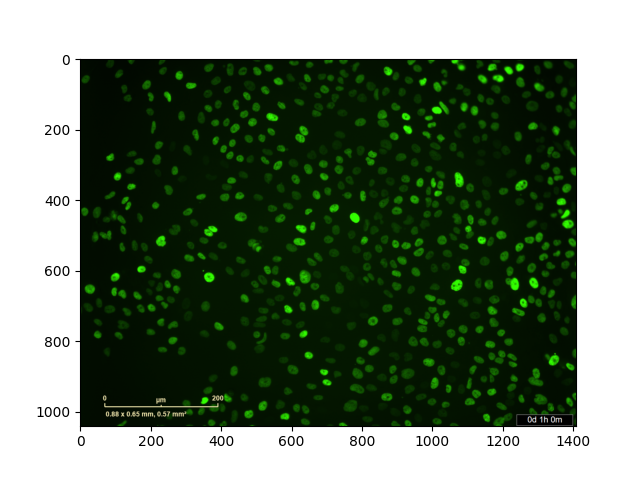

In [ ]:
%matplotlib ipympl
import matplotlib
import matplotlib.pyplot as plt

# Load the image
frames = []
folder = sorted(os.listdir('72hour'))
for filename in folder:
    img = Image.open("72hour/" + filename)
    frames.append(np.array(img))

fig, ax = plt.subplots()
ax.imshow(frames[1])

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print(ix, iy)

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [ ]:
from multiprocessing import Pool
import tqdm
import time

def _foo(my_number):
   square = my_number * my_number
   time.sleep(1)
   return square

if __name__ == '__main__':
   with Pool(5) as p:
      r = list(tqdm.tqdm(p.imap(_foo, range(30)), total=30))

100%|██████████| 30/30 [00:06<00:00,  4.99it/s]
